In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
Sibyl_vs_Bookies = "Resources/Sibyl_vs_Bookies_US_Football_top5.csv"


Sibyl_vs_Bookies_df = pd.read_csv(Sibyl_vs_Bookies)
Sibyl_vs_Bookies_df


,ID,League,Date,Time,Matchup_US_P,Visitor_Team,Home_Team,Visitor_Odd,Draw_Odd,Home_Odd,Bookies_choice,Sibyl,Confidence,Divergence_Y/N,Visi_Team_PTS,Home_Team_PTS,True_Result,Winner_Odd
0,0,ligue-1,2016-08-12,19:30,Guingamp @ Monaco,Guingamp,Monaco,5.50,3.70,1.69,Monaco,Monaco,0.559,N,2,2,Draw,3.70
1,1,premier-league,2016-08-13,15:00,Tottenham @ Everton,Tottenham,Everton,2.19,3.40,3.55,Tottenham,Everton,0.385,Y,1,1,Draw,3.40
2,2,premier-league,2016-08-13,15:00,Swansea City @ Burnley,Swansea City,Burnley,2.82,3.15,2.77,Burnley,Burnley,0.577,N,1,0,Swansea City,2.82
3,3,premier-league,2016-08-13,15:00,West Bromwich @ Crystal Palace,West Bromwich,Crystal Palace,3.91,3.17,2.17,Crystal Palace,Crystal Palace,0.385,N,1,0,West Bromwich,3.91
4,4,premier-league,2016-08-13,15:00,Watford @ Southampton,Watford,Southampton,4.86,3.71,1.79,Southampton,Southampton,0.427,N,1,1,Draw,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,328,serie-a,2016-10-16,14:00,Cagliari @ Inter Milan,Cagliari,Inter Milan,9.49,5.14,1.35,Inter Milan,Inter Milan,0.508,N,2,1,Cagliari,9.49
329,329,serie-a,2016-10-16,14:00,Empoli @ Genoa,Empoli,Genoa,4.95,3.50,1.81,Genoa,Genoa,0.542,N,0,0,Draw,3.50
330,330,serie-a,2016-10-16,14:00,Crotone @ Sassuolo,Crotone,Sassuolo,6.73,4.15,1.54,Sassuolo,Sassuolo,0.553,N,1,2,Sassuolo,1.54
331,331,serie-a,2016-10-16,19:45,AC Milan @ Chievo,AC Milan,Chievo,2.55,3.07,3.11,AC Milan,AC Milan,0.412,N,3,1,AC Milan,2.55


In [3]:
Sibyl_vs_Bookies_df["League"].unique()

array(['ligue-1', 'premier-league', 'laliga', 'serie-a', 'bundesliga'],
      dtype=object)

In [4]:
Sibyl_vs_Bookies_df["League"].value_counts()

ligue-1           78
serie-a           76
laliga            68
premier-league    68
bundesliga        43
Name: League, dtype: int64

In [5]:
reduced_df = Sibyl_vs_Bookies_df[["League", "Visitor_Team", "Home_Team", "Visitor_Odd",
                       "Draw_Odd", "Home_Odd", "Bookies_choice", "Sibyl", "Confidence", "Divergence_Y/N", "True_Result", "Winner_Odd"]]
reduced_df

,League,Visitor_Team,Home_Team,Visitor_Odd,Draw_Odd,Home_Odd,Bookies_choice,Sibyl,Confidence,Divergence_Y/N,True_Result,Winner_Odd
0,ligue-1,Guingamp,Monaco,5.50,3.70,1.69,Monaco,Monaco,0.559,N,Draw,3.70
1,premier-league,Tottenham,Everton,2.19,3.40,3.55,Tottenham,Everton,0.385,Y,Draw,3.40
2,premier-league,Swansea City,Burnley,2.82,3.15,2.77,Burnley,Burnley,0.577,N,Swansea City,2.82
3,premier-league,West Bromwich,Crystal Palace,3.91,3.17,2.17,Crystal Palace,Crystal Palace,0.385,N,West Bromwich,3.91
4,premier-league,Watford,Southampton,4.86,3.71,1.79,Southampton,Southampton,0.427,N,Draw,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...
328,serie-a,Cagliari,Inter Milan,9.49,5.14,1.35,Inter Milan,Inter Milan,0.508,N,Cagliari,9.49
329,serie-a,Empoli,Genoa,4.95,3.50,1.81,Genoa,Genoa,0.542,N,Draw,3.50
330,serie-a,Crotone,Sassuolo,6.73,4.15,1.54,Sassuolo,Sassuolo,0.553,N,Sassuolo,1.54
331,serie-a,AC Milan,Chievo,2.55,3.07,3.11,AC Milan,AC Milan,0.412,N,AC Milan,2.55


In [19]:
Confidence_percent = Sibyl_vs_Bookies_df["Confidence"]*100
Sibyl_vs_Bookies_df["Confidence_percent"] = Confidence_percent

Winner_Odd_percent = Sibyl_vs_Bookies_df["Winner_Odd"]*10
Sibyl_vs_Bookies_df["Winner_Odd_percent"] = Winner_Odd_percent

reduced_df

,League,Visitor_Team,Home_Team,Visitor_Odd,Draw_Odd,Home_Odd,Bookies_choice,Sibyl,Confidence,Divergence_Y/N,True_Result,Winner_Odd,Confidence_percent,Winner_Odd_percent
0,ligue-1,Guingamp,Monaco,5.50,3.70,1.69,Monaco,Monaco,0.559,N,Draw,3.70,55.9,37.0
1,premier-league,Tottenham,Everton,2.19,3.40,3.55,Tottenham,Everton,0.385,Y,Draw,3.40,38.5,34.0
2,premier-league,Swansea City,Burnley,2.82,3.15,2.77,Burnley,Burnley,0.577,N,Swansea City,2.82,57.7,28.2
3,premier-league,West Bromwich,Crystal Palace,3.91,3.17,2.17,Crystal Palace,Crystal Palace,0.385,N,West Bromwich,3.91,38.5,39.1
4,premier-league,Watford,Southampton,4.86,3.71,1.79,Southampton,Southampton,0.427,N,Draw,3.71,42.7,37.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,serie-a,Cagliari,Inter Milan,9.49,5.14,1.35,Inter Milan,Inter Milan,0.508,N,Cagliari,9.49,50.8,94.9
329,serie-a,Empoli,Genoa,4.95,3.50,1.81,Genoa,Genoa,0.542,N,Draw,3.50,54.2,35.0
330,serie-a,Crotone,Sassuolo,6.73,4.15,1.54,Sassuolo,Sassuolo,0.553,N,Sassuolo,1.54,55.3,15.4
331,serie-a,AC Milan,Chievo,2.55,3.07,3.11,AC Milan,AC Milan,0.412,N,AC Milan,2.55,41.2,25.5


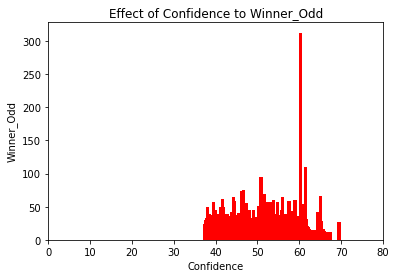

<Figure size 3600x360 with 0 Axes>

In [13]:
plt.bar(Sibyl_vs_Bookies_df['Confidence_percent'], Sibyl_vs_Bookies_df['Winner_Odd_percent'] , color='r', alpha=1.0, align="center")
plt.title("Effect of Confidence to Winner_Odd")
plt.xlabel("Confidence")
plt.ylabel("Winner_Odd")
plt.xlim(0,80)
plt.figure(figsize=(50,5))
plt.show
plt.savefig('sportsbet_confidence_to_winner_odd.png')

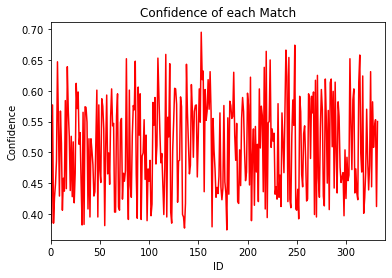

<Figure size 7200x3600 with 0 Axes>

In [26]:
plt.plot(Sibyl_vs_Bookies_df['ID'], Sibyl_vs_Bookies_df['Confidence'], color='r' )
plt.title("Confidence of each Match")
plt.xlabel("ID")
plt.ylabel("Confidence")
plt.xlim(0,340)
plt.figure(figsize=(100, 50))
plt.show
plt.savefig('sportsbet_confidence.png')

In [15]:
Sibyl_vs_Bookies_df[["Confidence_percent", "Winner_Odd_percent", "Visitor_Odd", "Draw_Odd", "Home_Odd"]].describe()

,Confidence_percent,Winner_Odd_percent,Visitor_Odd,Draw_Odd,Home_Odd
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,50.960360,28.664264,4.948408,4.002042,2.876637
std,7.765861,20.880983,4.803746,1.502556,2.153899
min,37.400000,10.600000,1.180000,2.860000,1.060000
25%,44.100000,17.500000,2.540000,3.230000,1.730000
50%,50.900000,24.900000,3.440000,3.460000,2.270000
75%,57.300000,33.500000,5.370000,4.070000,2.990000
max,69.500000,312.500000,37.270000,15.370000,17.180000


In [29]:
Sibyl_vs_Bookies_df[["Confidence_percent", "Winner_Odd_percent", "Visitor_Odd", "Draw_Odd", "Home_Odd"]].sem()



Confidence_percent    0.425567
Winner_Odd_percent    1.144271
Visitor_Odd           0.263244
Draw_Odd              0.082340
Home_Odd              0.118033
dtype: float64